<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [6]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Load the data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
data = pd.read_csv(file_path)

In [3]:
# Make a copy of original data
df = data.copy()

In [4]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


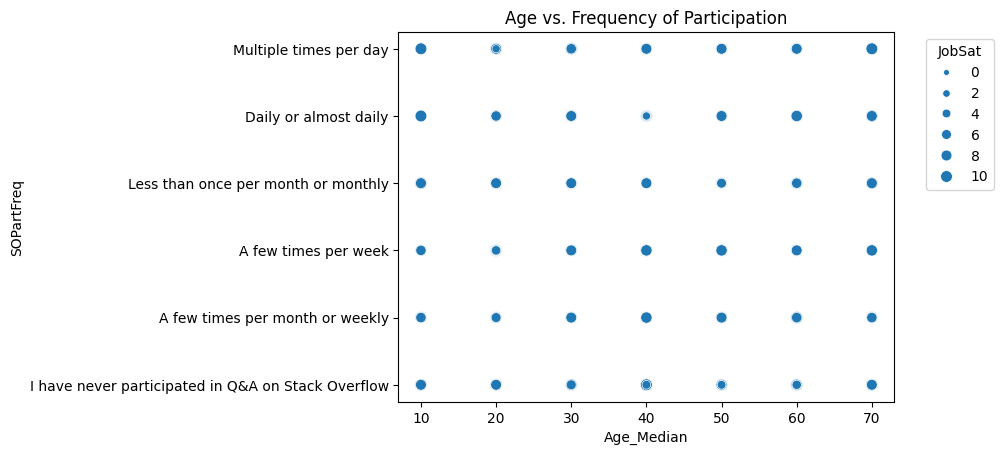

In [ ]:
sn.scatterplot(data=df, x='Age_Median', y='SOPartFreq', size='JobSat')
plt.title('Age vs. Frequency of Participation')
plt.xlabel('Age_Median')
plt.ylabel('SOPartFreq')
plt.legend(title='JobSat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


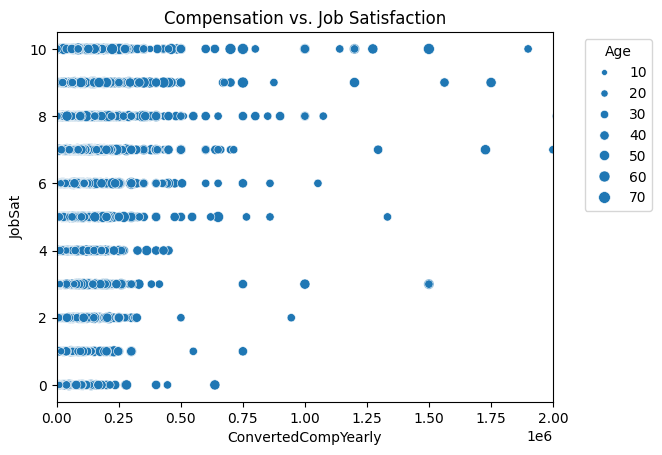

In [20]:
sn.scatterplot(data=df, x='ConvertedCompYearly', y='JobSat', size='Age_Median')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSat')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 2000000)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [39]:
top_lang = df['LanguageHaveWorkedWith'].value_counts().head().index.tolist()
df_filtered = df[df['LanguageHaveWorkedWith'].isin(top_lang)]
grouped = df_filtered.groupby(['Age_Median', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
grouped.head()

,Age_Median,LanguageHaveWorkedWith,Count
0,10.0,C#,15
1,10.0,HTML/CSS;JavaScript,24
2,10.0,HTML/CSS;JavaScript;PHP;SQL,2
3,10.0,HTML/CSS;JavaScript;TypeScript,13
4,10.0,Python,58


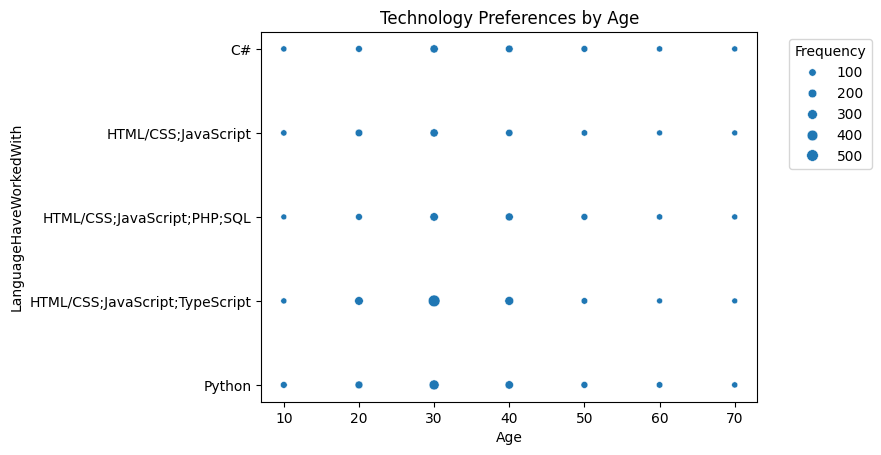

In [40]:
sn.scatterplot(data=grouped, x='Age_Median', y='LanguageHaveWorkedWith', size='Count')
plt.title('Technology Preferences by Age')
plt.xlabel('Age')
plt.ylabel('LanguageHaveWorkedWith')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


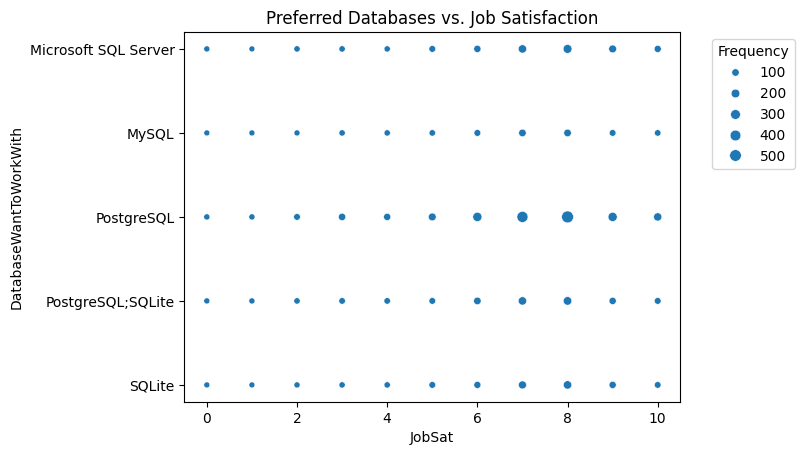

In [41]:
top_db = df['DatabaseWantToWorkWith'].value_counts().head().index.tolist()
df_filtered = df[df['DatabaseWantToWorkWith'].isin(top_db)]
grouped = df_filtered.groupby(['JobSat', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

sn.scatterplot(data=grouped, x='JobSat', y='DatabaseWantToWorkWith', size='Count')
plt.title('Preferred Databases vs. Job Satisfaction')
plt.xlabel('JobSat')
plt.ylabel('DatabaseWantToWorkWith')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


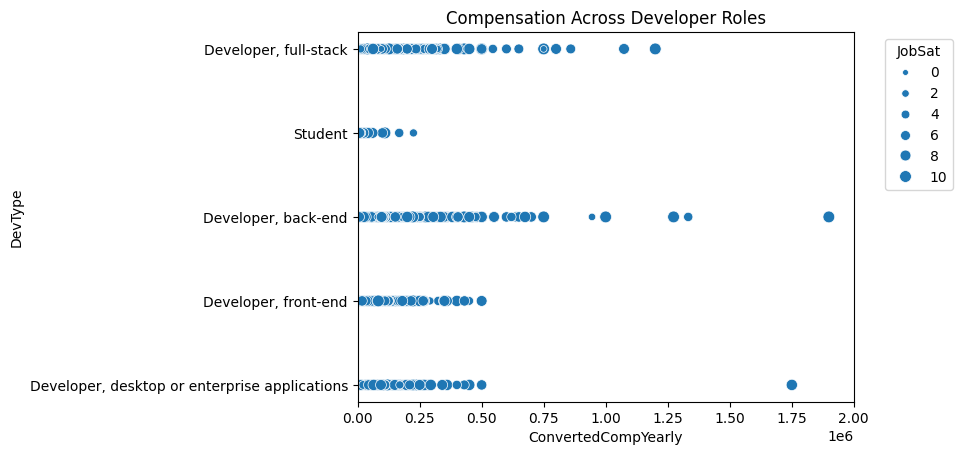

In [45]:
top_db = df['DevType'].value_counts().head().index.tolist()
df_filtered = df[df['DevType'].isin(top_db)]

sn.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='DevType', size='JobSat')
plt.title('Compensation Across Developer Roles')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('DevType')
plt.legend(title='JobSat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 2000000)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


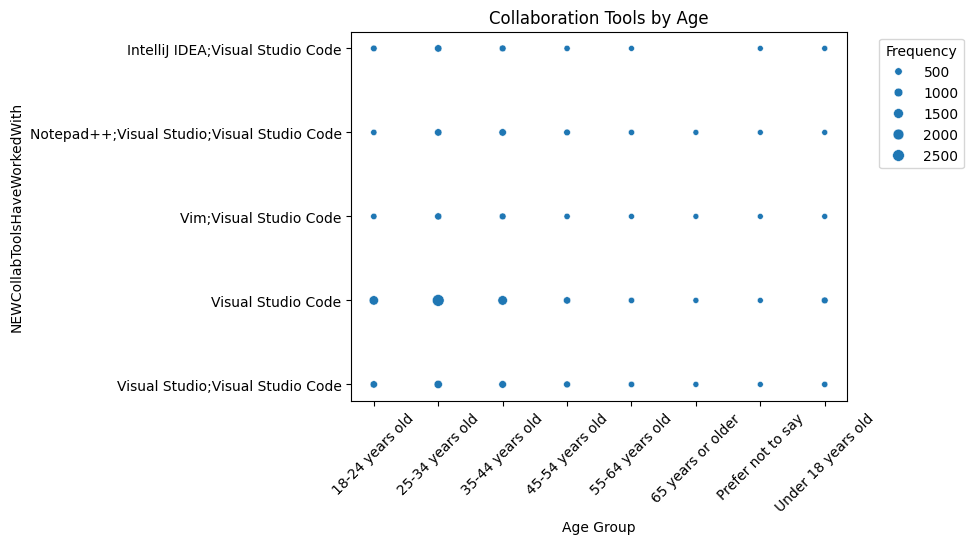

In [50]:
top = df['NEWCollabToolsHaveWorkedWith'].value_counts().head().index.tolist()
df_filtered = df[df['NEWCollabToolsHaveWorkedWith'].isin(top)]
grouped = df_filtered.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Count')

sn.scatterplot(data=grouped, x='Age', y='NEWCollabToolsHaveWorkedWith', size='Count')
plt.title('Collaboration Tools by Age')
plt.xlabel('Age Group')
plt.ylabel('NEWCollabToolsHaveWorkedWith')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



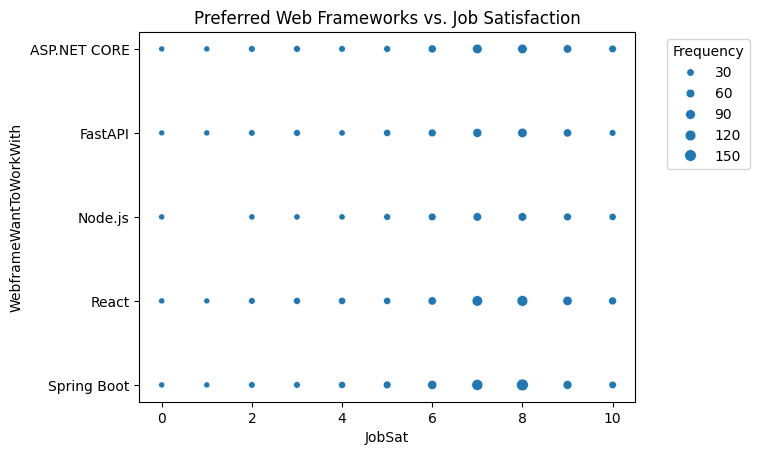

In [52]:
top = df['WebframeWantToWorkWith'].value_counts().head().index.tolist()
df_filtered = df[df['WebframeWantToWorkWith'].isin(top)]
grouped = df_filtered.groupby(['JobSat', 'WebframeWantToWorkWith']).size().reset_index(name='Count')

sn.scatterplot(data=grouped, x='JobSat', y='WebframeWantToWorkWith', size='Count')
plt.title('Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('JobSat')
plt.ylabel('WebframeWantToWorkWith')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



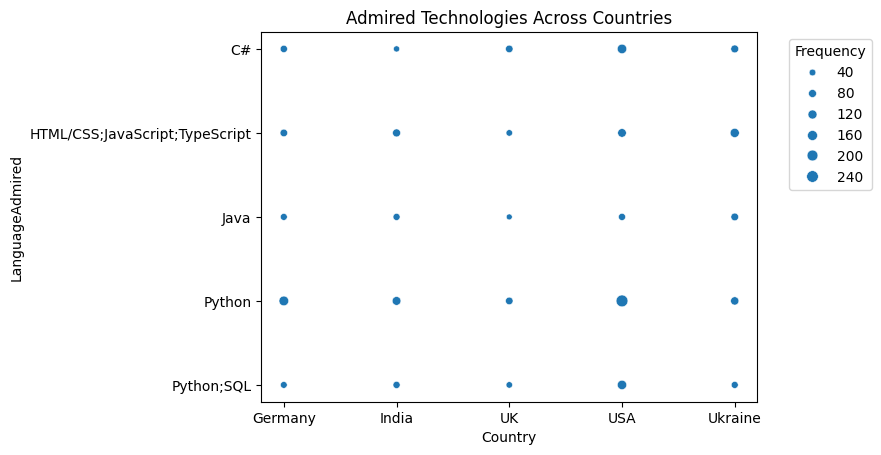

In [53]:
top_lang = df['LanguageAdmired'].value_counts().head().index.tolist()
top_cnt = df['Country'].value_counts().head().index.tolist()
df_filtered = df[df['LanguageAdmired'].isin(top_lang)]
df_filtered = df_filtered[df_filtered['Country'].isin(top_cnt)]

grouped = df_filtered.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Count')

sn.scatterplot(data=grouped, x='Country', y='LanguageAdmired', size='Count')
plt.title('Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('LanguageAdmired')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
